# implementing Neural Network in tensorflow 

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline 



In [15]:
w1_initial=np.random.normal(size=(28*28*1,10)).astype(np.float32)



In [16]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y


# Load Image

In [17]:
train_img=np.load('/home/user01/data/train_img.npy')
train_lab=np.load('/home/user01/data/train_lab.npy')
test_img=np.load('/home/user01/data/test_img.npy')
test_lab=np.load('/home/user01/data/test_lab.npy')
val_img=np.load('/home/user01/data/val_img.npy')
val_lab=np.load('/home/user01/data/val_lab.npy')

print np.shape(val_img)

(5000, 28, 28, 1)


[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


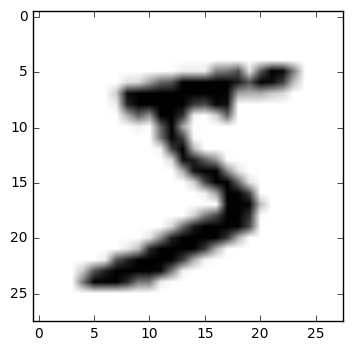

In [18]:

img=np.reshape(val_img[0] ,newshape=[28,28])
lab=val_lab[0]
print lab

plt.imshow(img, cmap='binary' )


# Building graph

In [19]:

x_pre=tf.placeholder(tf.float32 , shape=[None,28,28,1])
x_ = tf.reshape(x_pre , shape=[-1,28*28*1])
y_=tf.placeholder(tf.float32 , shape=[None , 10])


In [20]:
#Layer1 without Batch Normalization  
w1 = tf.Variable(w1_initial)
b1=tf.Variable(tf.zeros([10]))
z1=tf.matmul(x_,w1)
l1=tf.nn.relu(z1)
y=tf.nn.softmax(l1)

# training

In [21]:
cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step =tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_ , 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))




# Training Nueral Network

In [22]:
zs , BNs , acc, acc_BNs = [],[],[],[]


init=tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
acc,zs,acc_val , zs_val =[],[],[],[]
start_time=time.time()
for i in range(10000):

    batch_xs , batch_ys =next_batch( 60 , train_img , train_lab) 
    sess.run( train_step , feed_dict ={ x_pre: batch_xs , y_ :batch_ys })
    if i%50 is 0:
        train_res = sess.run([accuracy , z1 ] , feed_dict = {x_pre:batch_xs, y_ : batch_ys})
        val_res   = sess.run([accuracy , z1 ] , feed_dict = {x_pre:val_img, y_ : val_lab})
        
        print 'step:',i, 'training',train_res[0],'           validation' , val_res[0] 
        acc.append(train_res[0])
        #print np.shape(train_res[1])
        #print np.mean(train_res[1])
        
        zs.append(np.mean(train_res[1] , axis=0))
        print 
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1] , axis=0))            
end_time=time.time()
zs , val_zs , acc, acc_val = np.array(zs) , np.array(zs_val) , np.array(acc) , np.array(acc_val)
#when we test , through using above 4 parameter we get more higher accuracy 
test_res = sess.run([accuracy , z1 ] , feed_dict = {x_pre:test_img, y_ : test_lab})
print 'test accuracy : ' , test_res[0] 
print 'final output ' , test_res[1]
print 'The time taken by Training: ',end_time - start_time

step: 0 training 0.0666667            validation 0.0546

step: 50 training 0.183333            validation 0.198

step: 100 training 0.183333            validation 0.2338

step: 150 training 0.183333            validation 0.2724

step: 200 training 0.283333            validation 0.304

step: 250 training 0.35            validation 0.3206

step: 300 training 0.3            validation 0.333

step: 350 training 0.216667            validation 0.343

step: 400 training 0.383333            validation 0.37

step: 450 training 0.366667            validation 0.3814

step: 500 training 0.416667            validation 0.394

step: 550 training 0.5            validation 0.4046

step: 600 training 0.366667            validation 0.4086

step: 650 training 0.416667            validation 0.4202

step: 700 training 0.416667            validation 0.4264

step: 750 training 0.483333            validation 0.4298

step: 800 training 0.416667            validation 0.4306

step: 850 training 0.466667          

In [28]:
print np.shape(test_res[1])
print (test_res[1][0,:])


(10000, 10)
[ -8.81210518 -25.73519325  -2.65666533  -1.59528399 -12.83856583
 -11.61390877 -25.44496155  10.62966824 -19.78624916 -18.07916451]


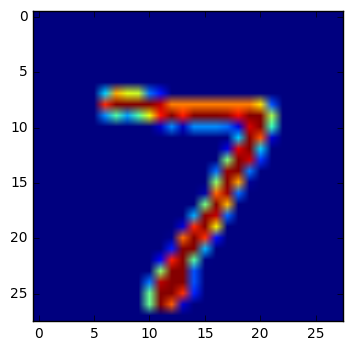

In [30]:
res_img=np.reshape(test_img[0] , newshape=[28,28])
plt.imshow(res_img)

In [ ]:
print np.shape(zs)

In [ ]:

fig ,ax = plt.subplots()

ax.plot(range(0,len(acc)*50 , 50) , acc , label='Training accuracy')
ax.plot(range(0,len(acc)*50 , 50) ,acc_val , 'r',label='Validation accuracy' )

ax.set_xlabel('Training steps')
ax.set_ylabel('Accuracy')
ax.set_ylim([0,1])
ax.set_title("Training Accuracy Vs Validation Accuracy")
ax.legend(loc=4)
plt.show()
        
        
        

In [ ]:

fig ,axes = plt.subplots(10,2 , figsize=(6,20))
fig.tight_layout()

for i , ax  in enumerate(axes):
    ax[0].set_title("Training")
    ax[1].set_title("Validation")
    ax[0].plot(zs[:,i])
    ax[1].plot(val_zs[:,i])